In [1]:
from sqlalchemy import create_engine
import pandas as pd
# Postgres username, password, and database name
POSTGRES_ADDRESS = 'postgresdb' # Nombre del nombre del contenedor donde esta la base de datos
POSTGRES_PORT = '5432'
POSTGRES_USERNAME = 'postgres' # Nombre de usuario pasado como enviroment
POSTGRES_PASSWORD = '12345' #Contraseña
POSTGRES_DBNAME= "postgres" #Nombre de la base de datos (select current_database(); en psql)

connection_format = "postgresql://{username}:{password}@{ipaddress}:{port}/{dbname}"

postgres_str = connection_format.format(username=POSTGRES_USERNAME,password=POSTGRES_PASSWORD,ipaddress=POSTGRES_ADDRESS,port=POSTGRES_PORT,dbname=POSTGRES_DBNAME)
# Create the connection
cnn = create_engine(postgres_str)
#conn=p.connect(dbname='test', user='postgres', host='postgresdb', password='12345', port=5432)

pd.read_sql_query('select * from bees limit 10;', cnn)

program  year        period    state  ansi        affected_by  \
0   SURVEY  2019  JAN THRU MAR  Alabama     1            Disease   
1   SURVEY  2019  JAN THRU MAR  Alabama     1              Other   
2   SURVEY  2019  JAN THRU MAR  Alabama     1         Pesticides   
3   SURVEY  2019  JAN THRU MAR  Alabama     1  Pests_excl_Varroa   
4   SURVEY  2019  JAN THRU MAR  Alabama     1            Unknown   
..     ...   ...           ...      ...   ...                ...   
95  SURVEY  2015  JUL THRU SEP  Alabama     1       Varroa_mites   
96  SURVEY  2015  OCT THRU DEC  Alabama     1            Disease   
97  SURVEY  2015  OCT THRU DEC  Alabama     1              Other   
98  SURVEY  2015  OCT THRU DEC  Alabama     1         Pesticides   
99  SURVEY  2015  OCT THRU DEC  Alabama     1  Pests_excl_Varroa   

    pct_of_colonies_impacted state_code  
0                        1.8         AL  
1                        3.1         AL  
2                        0.3         AL  
3                       22.7         AL  
4                        9.0         AL  
..                       ...        ...  
95                      63.1         AL  
96                       0.2         AL  
97                       2.8         AL  
98                       0.2         AL  
99                       6.4         AL  

[100 rows x 8 columns]

<AxesSubplot:title={'center':'Florida 2019'}, xlabel='affected_by'>

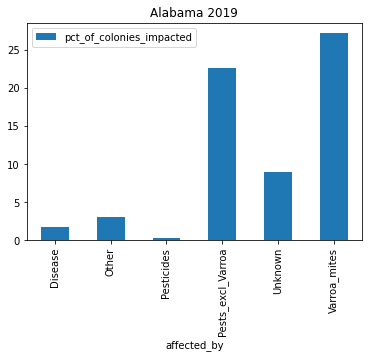

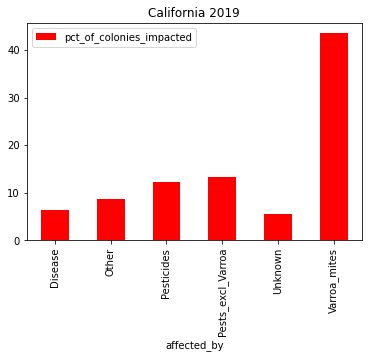

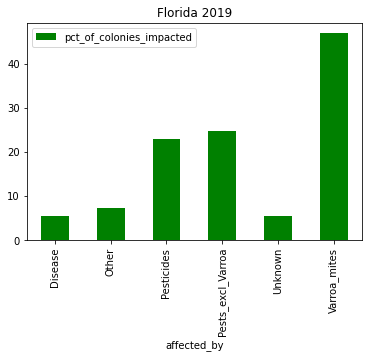

In [9]:
import matplotlib.pyplot as plt
import pandas as pd
df = pd.read_sql_query('select * from bees;', cnn)
alabama = df[(df["state"] == "Alabama") & (df["year"]==2019)]
florida = df[(df["state"] == "Florida") & (df["year"]==2019)]
california= df[(df["state"] == "California") & (df["year"]==2019)]

alabama.plot.bar(x="affected_by", y=["pct_of_colonies_impacted"],title="Alabama 2019")
california.plot.bar(x="affected_by", y=["pct_of_colonies_impacted"],title="California 2019", color="red")
florida.plot.bar(x="affected_by", y=["pct_of_colonies_impacted"],title="Florida 2019", color="green")